In [0]:
#я не торч просто дунул
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [94]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


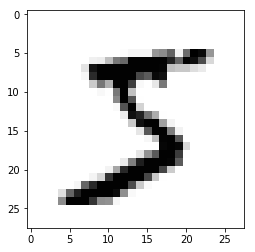

tensor(5)


In [95]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :], cmap='Greys')
plt.show()
print(y_train[0])


In [96]:
len(X_train), len(y_train)

(60000, 60000)

In [97]:
#добавим размерность, отвечающую кол-ву каналов
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

X_train.shape, X_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [0]:
X_test = X_test.to(device)
y_test = y_test.to(device)

In [0]:
from sklearn.metrics import accuracy_score

class LeNet5(torch.nn.Module):
  def __init__(self, n_epochs=5000, lr=0.001, batch_size=100):
    self.n_epochs = n_epochs
    self.lr = lr
    self.batch_size = batch_size
    
    super(LeNet5, self).__init__()
    
    self.conv1 = torch.nn.Conv2d(
                  in_channels=1, out_channels=6, kernel_size=5, padding=2) 
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv2 = torch.nn.Conv2d(
                  in_channels=6, out_channels=16, kernel_size=5, padding=0) 
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
    self.act3 = torch.nn.Tanh()
    
    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.Tanh()
    
    self.fc3 = torch.nn.Linear(84, 10)
    
    self.sm = torch.nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
      
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)
      
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
      
    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)
      
    return x
    
  def train(self, x, y):
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(self.parameters(), self.lr)
    
    for _ in range(self.n_epochs):
      shuffled_indexes = np.random.permutation(x.shape[0])
      
      for start_index in range(0, x.shape[0], self.batch_size):
        x_batch = x[shuffled_indexes[start_index:start_index + self.batch_size]].to(device)
        y_batch = y[shuffled_indexes[start_index:start_index + self.batch_size]].to(device)
       
        optimizer.zero_grad()
        y_out = self.forward(x_batch)
        loss_value = loss(y_out, y_batch)
        loss_value.backward()
        optimizer.step()
        
      print(accuracy_score(self.predict(X_test), y_test))
      
    return self
    
  def predict(self, x):
    return self.forward(x).argmax(dim=1)
    
  def predict_proba(x):
    return self.sm(self.forward(x))

    

In [0]:
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [0]:
lenet5 = LeNet5(n_epochs=20)
lenet5 = lenet5.to(device)

In [102]:
lenet5.train(X_train, y_train)

0.9749
0.9831
0.9835
0.9872
0.9882
0.9875


KeyboardInterrupt: ignored